___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [114]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
import cufflinks as cf

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# To suppress Pandas Future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [115]:
def matris_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

def model_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)   



In [116]:
df0 = pd.read_csv('creditcard.csv')
df0.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89663,62673.000,-2.605,-1.084,1.033,0.625,-1.031,0.457,-1.101,1.222,-1.430,0.095,0.027,-0.376,-1.518,0.939,0.381,-1.395,0.588,2.172,-0.187,-0.507,-0.009,-0.096,-0.483,-0.317,0.193,-0.076,-0.074,-0.389,150.750,0
157541,110031.000,-0.153,1.140,0.223,-0.367,0.946,-0.258,0.932,-0.295,1.369,-0.053,1.935,-1.999,1.466,1.802,-0.445,-0.648,0.099,1.005,0.469,0.225,0.184,1.240,-0.236,0.671,-0.426,-0.516,0.408,0.114,1.000,0
19117,30031.000,0.988,-0.056,0.178,1.029,-0.163,-0.153,0.116,0.062,-0.204,0.115,1.428,0.661,-0.662,0.748,0.545,-0.008,-0.364,-0.016,-0.463,-0.022,0.153,0.260,-0.153,0.019,0.533,-0.323,0.006,0.021,92.500,0
5434,5423.000,-1.241,1.215,2.042,0.697,0.233,2.036,-0.475,1.186,0.466,-0.861,3.017,-1.425,1.667,2.083,1.140,-0.874,1.538,-0.835,-1.106,-0.050,0.020,0.379,-0.007,-1.098,-0.128,-0.286,0.262,0.062,18.860,0
136274,81624.000,1.010,0.073,1.715,2.422,-0.888,0.694,-0.958,0.492,-0.207,0.781,1.290,0.196,-0.869,0.213,0.743,1.198,-0.777,0.565,-1.563,-0.197,0.318,0.851,0.022,0.210,0.085,0.112,0.051,0.030,12.160,0
121633,76260.000,-1.330,0.847,1.515,-1.138,-0.224,2.010,-1.733,-2.779,-1.058,0.572,0.186,0.558,1.631,-0.799,-0.376,0.600,0.662,-0.593,2.216,-0.294,3.383,0.099,-0.424,-1.269,0.520,0.289,0.295,0.085,19.170,0
279960,169208.000,-5.389,3.732,-2.145,-0.681,0.177,2.138,-4.074,-14.302,1.567,0.506,-1.048,1.177,-0.010,-1.102,-1.100,0.202,1.710,0.285,-0.333,-3.768,13.466,-4.169,2.323,0.411,0.491,0.715,1.117,0.210,8.620,0


### Exploratory Data Analysis

In [117]:
df = df0.copy()

In [118]:
df.shape

(284807, 31)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [121]:
df.duplicated().sum()

1081

In [122]:
df.drop_duplicates(inplace=True)

In [123]:
df.shape

(283726, 31)

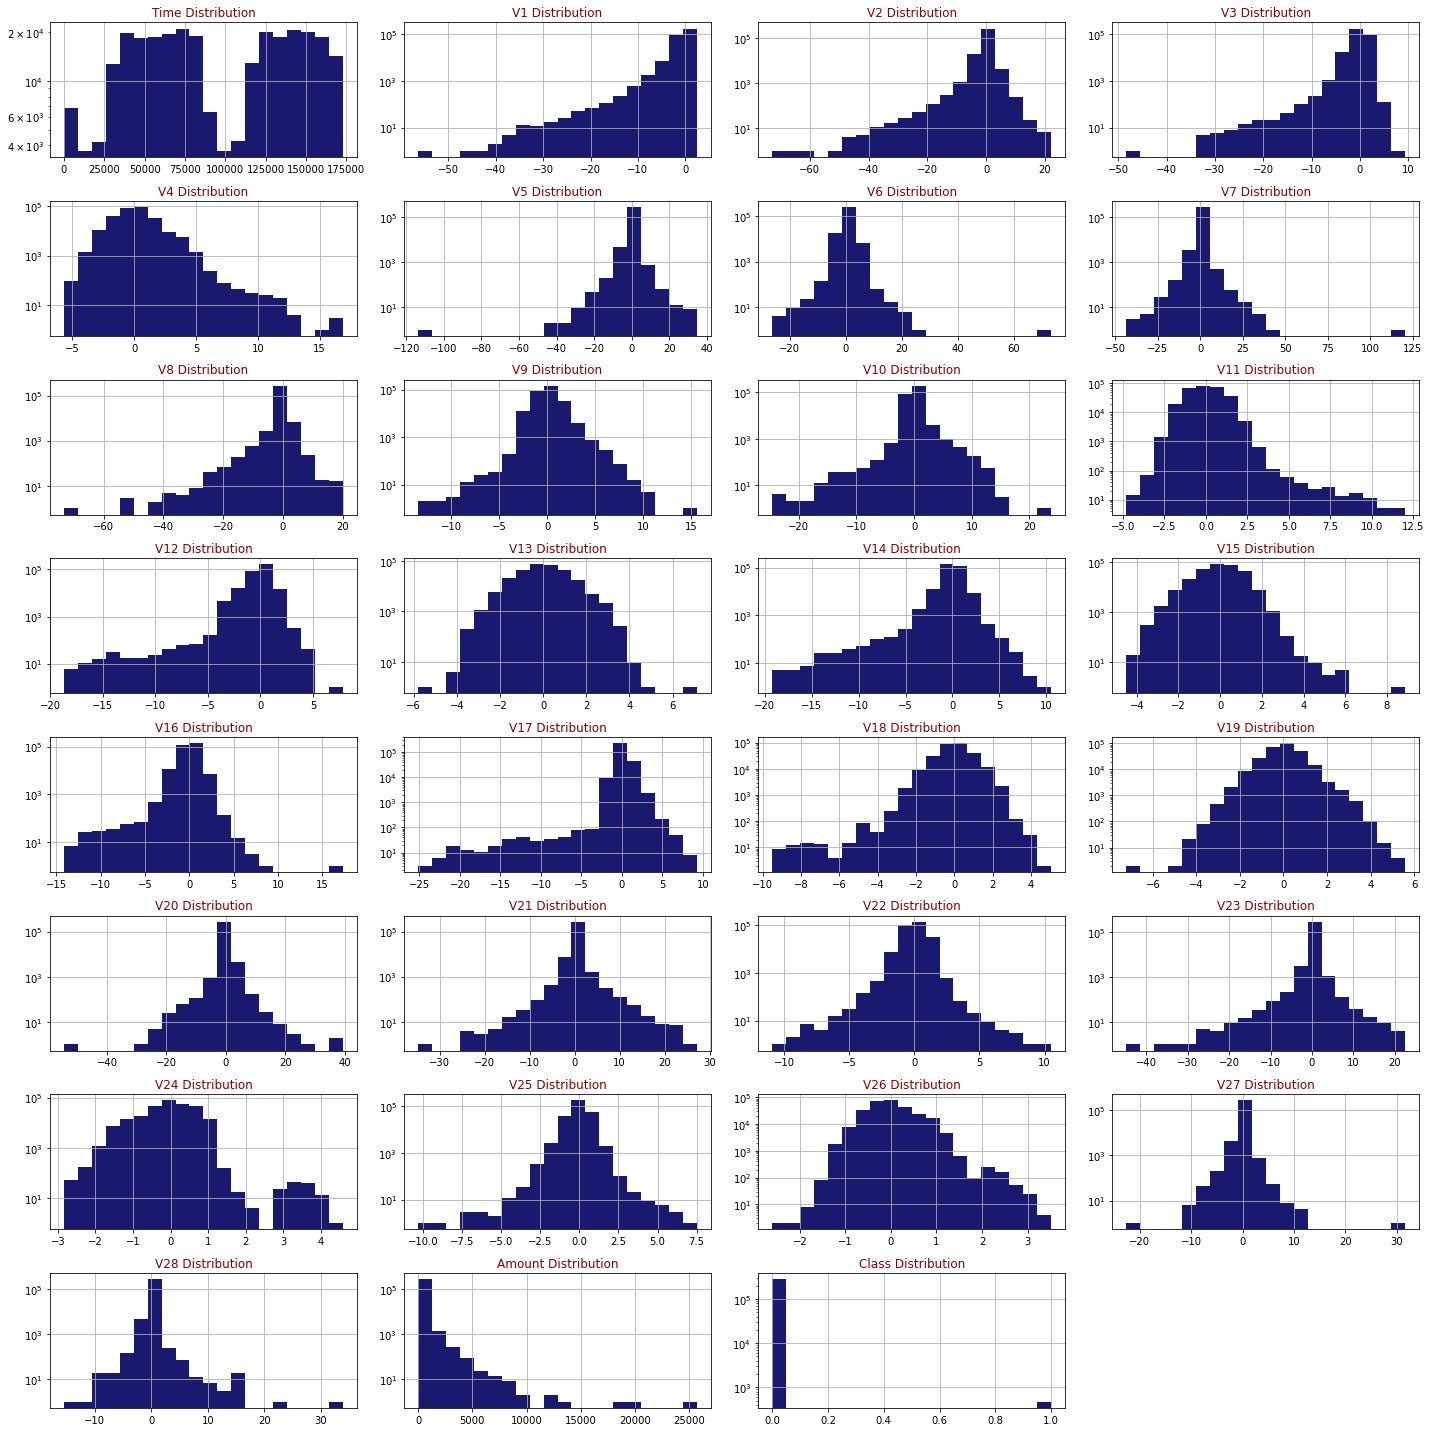

In [124]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,4)

Examination of Class Column

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


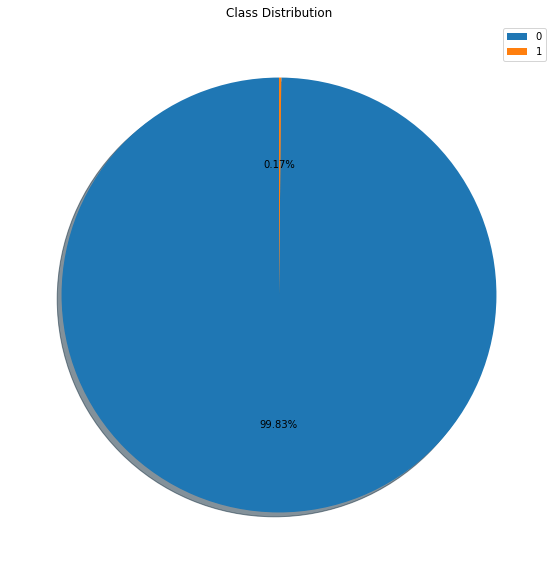

In [125]:
# The classes are heavily skewed we need to solve this issue later.
plt.figure(figsize=(12,10))

explode = [0,0.0001]
plt.pie(df['Class'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True, startangle=90)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [126]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

* This is highly imbalanced dataset

In [127]:
df[df.Class == 0].Amount.describe()

count   283253.000
mean        88.414
std        250.379
min          0.000
25%          5.670
50%         22.000
75%         77.460
max      25691.160
Name: Amount, dtype: float64

*For safe transactions*
- Amount of transaction ranges from 0 to 25691.16
- Average transaction value is 88.4

In [128]:
df[df.Class == 1].Amount.describe()

count    473.000
mean     123.872
std      260.211
min        0.000
25%        1.000
50%        9.820
75%      105.890
max     2125.870
Name: Amount, dtype: float64

*For fraud transactions*
- Amount of transaction ranges from 0 to 2125.87
- Average transaction value is 123.871860

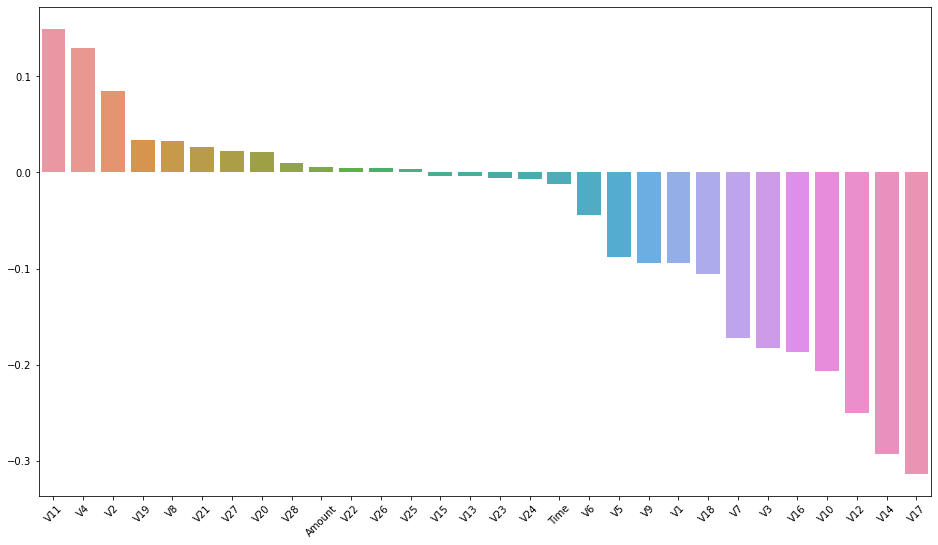

In [129]:
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)

    
plt.xticks(rotation = 45);

- Class column is correlated with V12, V14, V11, V4 and V17.

In [130]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,0.03,-0.25,0.13,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,-0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


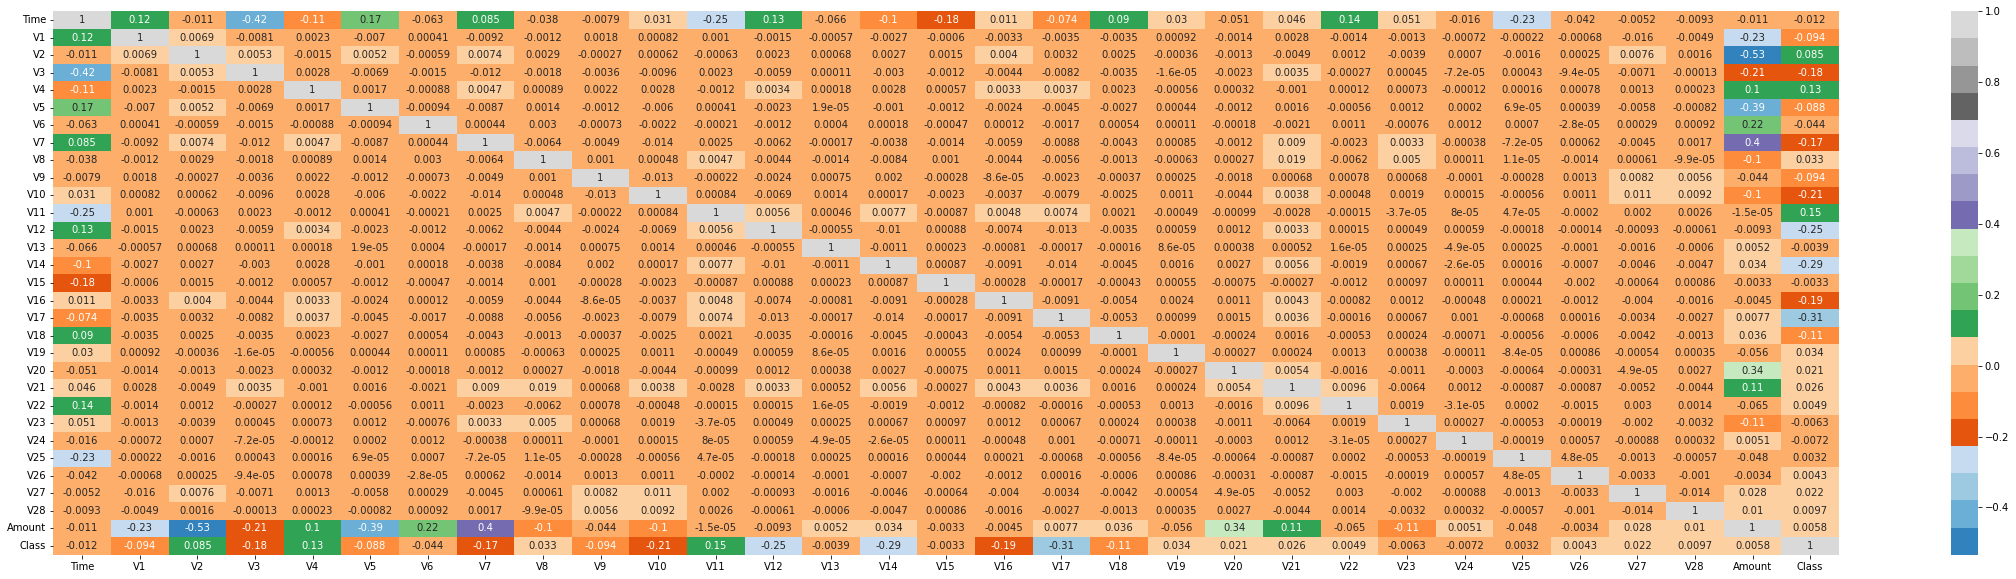

In [131]:
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

In [132]:
df.Time.sample(10)

108018    70723.000
278579   168303.000
2188       1705.000
126930    78151.000
230756   146465.000
134643    80898.000
44125     41805.000
221237   142487.000
110924    72027.000
94937     65097.000
Name: Time, dtype: float64

In [133]:
df.drop("Time", axis=1, inplace=True)

Dropping Time as it's non business required data


### Data Cleaning
Check Missing Values and Outliers

In [134]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

V1       0.000
V2       0.000
Amount   0.000
V28      0.000
V27      0.000
V26      0.000
V25      0.000
V24      0.000
V23      0.000
V22      0.000
V21      0.000
V20      0.000
V19      0.000
V18      0.000
V17      0.000
V16      0.000
V15      0.000
V14      0.000
V13      0.000
V12      0.000
V11      0.000
V10      0.000
V9       0.000
V8       0.000
V7       0.000
V6       0.000
V5       0.000
V4       0.000
V3       0.000
Class    0.000
dtype: float64

In [135]:
# percentage of missing values in each row
round(100 * (df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

0        0.000
189831   0.000
189837   0.000
189836   0.000
189835   0.000
          ... 
94931    0.000
94932    0.000
94933    0.000
94934    0.000
284806   0.000
Length: 283726, dtype: float64

* There are no missing / Null values either in columns or rows

In [136]:
df.shape

(283726, 30)

In [137]:
df.drop_duplicates(inplace=True)

In [138]:
df.shape

(275663, 30)

There are no duplicates

---
---


- Class column is correlated with V12, V14, V11, V4 and V17.

In [139]:
df2 = df[(df["Class"] == 1) | (df["V17"]< 0.4) & (df["V14"]< 0.5) & (df["V12"] < 0.1) & (df["V10"]<=0.2)]

In [140]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
6,1.230,0.141,0.045,1.203,0.192,0.273,-0.005,0.081,0.465,-0.099,-1.417,-0.154,-0.751,0.167,0.050,-0.444,0.003,-0.612,-0.046,-0.220,-0.168,-0.271,-0.154,-0.780,0.750,-0.257,0.035,0.005,4.990,0
8,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,-0.410,-0.705,-0.110,-0.286,0.074,-0.329,-0.210,-0.500,0.119,0.570,0.053,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.200,0
25,-2.074,-0.121,1.322,0.410,0.295,-0.960,0.544,-0.105,0.476,0.149,-0.857,-0.181,-0.655,-0.280,-0.212,-0.333,0.011,-0.488,0.506,-0.387,-0.404,-0.227,0.742,0.399,0.249,0.274,0.360,0.243,26.430,0
36,-0.246,0.473,1.696,0.262,-0.011,-0.611,0.794,-0.247,0.139,-0.401,-0.812,-0.184,-0.630,-0.286,-0.337,-0.428,-0.031,-0.505,0.355,0.046,-0.195,-0.335,-0.078,0.393,-0.031,0.198,-0.175,-0.204,30.490,0


In [141]:
df2.shape

(32092, 30)

In [142]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []

models.append(('LR', LogisticRegression(random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []



for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score train
0,LR,0.999,0.999,0.574,0.644,0.684,0.746


In [143]:
X = df2.drop(['Class'],axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []

models.append(('LR', LogisticRegression(random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []


for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
0,LR,0.996,0.995,0.811,0.775,0.831,0.830,0.851,0.893


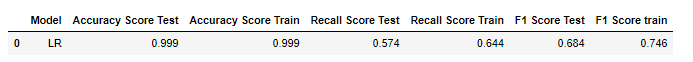

Comparison with Featured Selected dataframe

In [144]:
y_train.value_counts()

0    22118
1      346
Name: Class, dtype: int64

## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

Feature Selection

In [145]:
X = df.drop('Class',axis=1)
y = df['Class']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [147]:
X_train.shape

(248096, 29)

In [148]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (248096, 29)
Train target shape   :  (248096,)
Test features shape  :  (27567, 29)
Test target shape    :  (27567,)


#### Scaling

In [149]:
scaler = StandardScaler()

In [150]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [153]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

***ii. Model Training***

In [154]:
log_model = LogisticRegression()

In [155]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [156]:
log_model.coef_

array([[ 0.17041262,  0.03955961,  0.04321994,  1.01408932,  0.14067649,
        -0.15583409, -0.13046108, -0.20199748, -0.21129664, -0.92414895,
        -0.00904582,  0.04777104, -0.33050603, -0.49356797, -0.05874797,
        -0.16329804,  0.00717702, -0.03208408,  0.03965962, -0.34411218,
         0.28086977,  0.43443457, -0.07464241,  0.09302658,  0.00761809,
         0.02764906, -0.32103038, -0.09473597,  0.22118969]])

In [157]:
log_model.intercept_

array([-8.63778427])

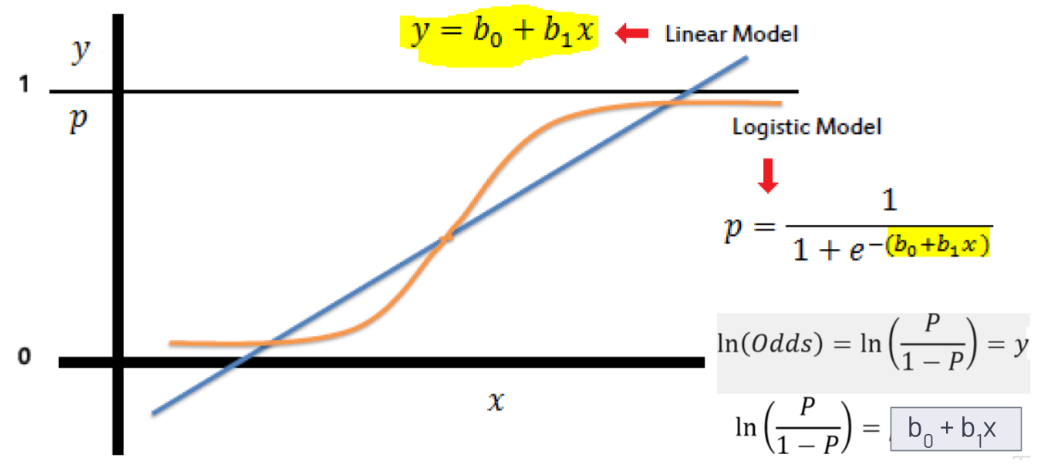

***iii. Prediction and Model Evaluating***

In [158]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
pd.options.display.float_format = '{:.2f}'.format

In [160]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.99822074e-01, 1.77926135e-04],
       [9.99618808e-01, 3.81191965e-04],
       [9.99238657e-01, 7.61342786e-04],
       ...,
       [9.99765115e-01, 2.34885226e-04],
       [9.99998368e-01, 1.63167600e-06],
       [9.99513404e-01, 4.86595939e-04]])

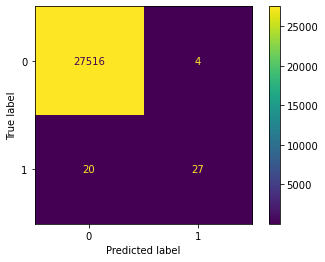

In [161]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

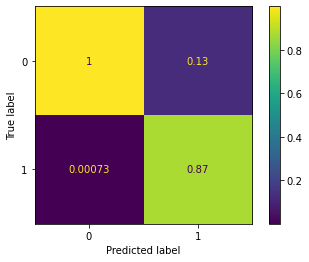

In [162]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27520
           1       0.87      0.57      0.69        47

    accuracy                           1.00     27567
   macro avg       0.94      0.79      0.85     27567
weighted avg       1.00      1.00      1.00     27567



In [164]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    247670
           1       0.87      0.61      0.72       426

    accuracy                           1.00    248096
   macro avg       0.94      0.81      0.86    248096
weighted avg       1.00      1.00      1.00    248096



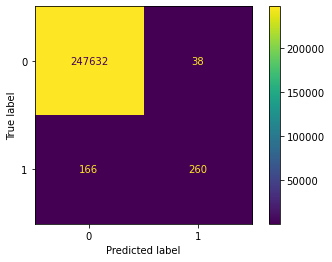

In [165]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

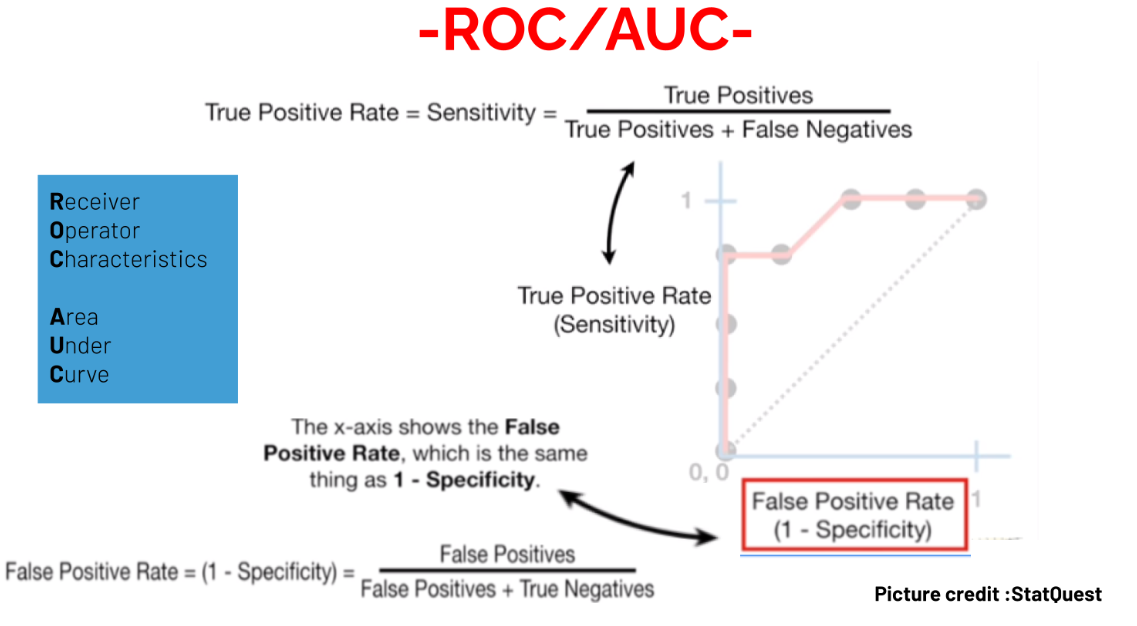

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate

***iv. Plot Precision and Recall Curve***


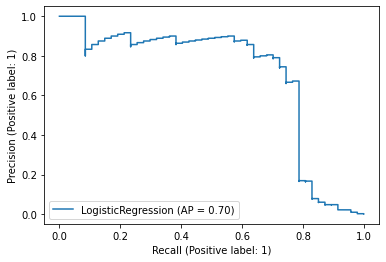

In [166]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

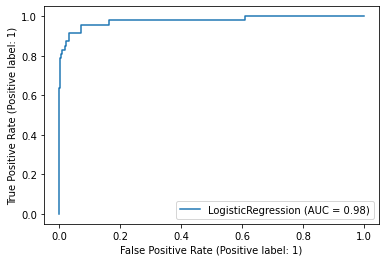

In [167]:
plot_roc_curve(log_model, X_test_scaled, y_test);

***v. Apply StratifiedKFold***

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbours from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbour.

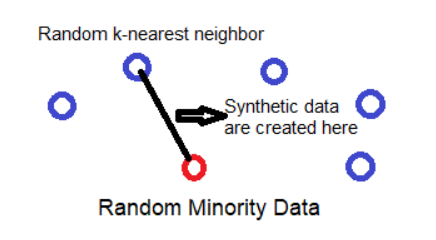 [source](https://miro.medium.com/max/434/1*m0sr75BFm4C3kTbb84iWVQ.png)

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

In [168]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [169]:
over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [170]:
X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [171]:
X_test.shape


(33023, 29)

In [172]:
y_test.shape


(33023,)

In [173]:
X_train.shape

(77053, 29)

In [174]:
y_train.shape

(77053,)

***ii. Model Training***

In [175]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)



***iii. Prediction and Model Evaluating***

In [176]:
# prediction for training dataset
train_pred = log_model.predict(X_train_scaled)

# prediction for testing dataset
test_pred = log_model.predict(X_test_scaled)

In [177]:
print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

---------------------Test Scores---------------------
[[16210   302]
 [ 1108 15403]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16512
           1       0.98      0.93      0.96     16511

    accuracy                           0.96     33023
   macro avg       0.96      0.96      0.96     33023
weighted avg       0.96      0.96      0.96     33023



In [178]:
print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = log_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

---------------------Train Scores---------------------
[[37871   655]
 [ 2436 36091]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     38526
           1       0.98      0.94      0.96     38527

    accuracy                           0.96     77053
   macro avg       0.96      0.96      0.96     77053
weighted avg       0.96      0.96      0.96     77053



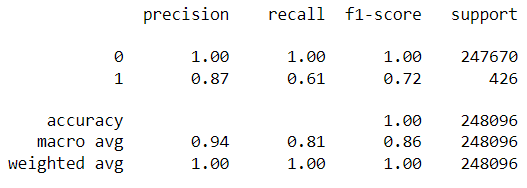

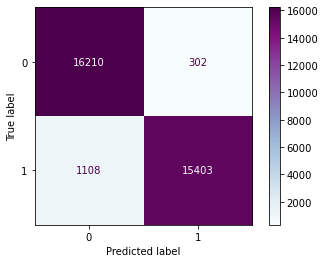

In [179]:
plot_confusion_matrix(log_model, X_test, y_test,cmap="BuPu");

***iv.  Plot Precision and Recall Curve***


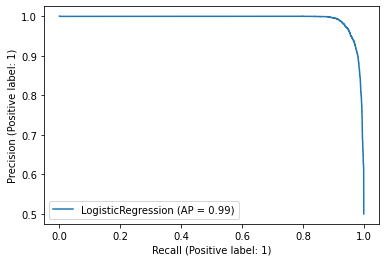

In [180]:
plot_precision_recall_curve(log_model, X_test, y_test);

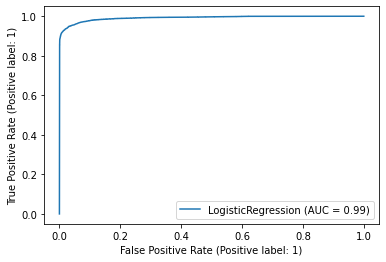

In [181]:
plot_roc_curve(log_model, X_test, y_test);

***v. Apply StratifiedKFold***

In [182]:
from sklearn.model_selection import StratifiedKFold

In [183]:
 y_pred_proba = log_model.predict_proba(X_test_scaled)

In [184]:
precisions, recalls, thresholds = precision_recall_curve(test_pred, y_pred_proba[:,1])

In [185]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5019878454293543

In [186]:
# Modeli kaç parçaya ayırmak istiyorsak ona göre index numaraları belirler.

def cv_kfold(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 16)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [188]:
X_train_scaled.shape, y_train.shape, y_test.shape, y_pred.shape

((248096, 29), (77053,), (33023,), (33023,))

In [187]:
matris_scorer(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set


ValueError: Found input variables with inconsistent numbers of samples: [33023, 27567]

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

***ii. Prediction and Model Evaluating***

***iii. Plot Precision and Recall Curve***


***iv. Apply StratifiedKFold***

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___